## Idea

Ambulance response times in NYC: The black spots to have an emergency in NYC

### Questions

Which are the worst communicated areas to have an emergency?
Which is the Ambulance Response Times for different areas in NYC?
How long does it take for an ambulance to arrive to the emergency scene?
Which are the average response times for eack kind of emergencies?

### Context

I am going to analise the [Emergency Medical Services (EMS)]() Incident Dispatch Data.

https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj


The EMS Incident Dispatch Data file contains data that is generated by the EMS Computer Aided Dispatch System. The data spans from the time the incident is created in the system to the time the incident is closed in the system. It covers information about the incident as it relates to the assignment of resources and the Fire Department’s response to the emergency. To protect personal identifying information in accordance with the Health Insurance Portability and Accountability Act (HIPAA), specific locations of incidents are not included and have been aggregated to a higher level of detail.

The data can be donwloaded in .csv or accesed via API:

https://dev.socrata.com/foundry/data.cityofnewyork.us/66ae-7zpy
    
As there are ~7M of rows and 32 columns, I am going to pull the data via API.

#### Resources:
* SODA: https://dev.socrata.com/
* Paging through Data: https://dev.socrata.com/docs/paging.html#2.1
* Authentication: https://dev.socrata.com/docs/authentication.html
    

### First approach with requests

In [29]:
import requests
response = requests.get('https://data.cityofnewyork.us/resource/66ae-7zpy.json')
data = response.json()
print(data[0])

{'borough': 'BRONX', 'cad_incident_id': '130010001', 'citycouncildistrict': '18', 'communitydistrict': '209', 'communityschooldistrict': '12', 'congressionaldistrict': '15', 'dispatch_response_seconds_qy': '101', 'final_call_type': 'RESPIR', 'final_severity_level_code': '4', 'first_activation_datetime': '2013-01-01T00:01:51.000', 'first_assignment_datetime': '2013-01-01T00:01:45.000', 'first_hosp_arrival_datetime': '2013-01-01T00:38:15.000', 'first_on_scene_datetime': '2013-01-01T00:13:21.000', 'first_to_hosp_datetime': '2013-01-01T00:28:49.000', 'held_indicator': 'N', 'incident_close_datetime': '2013-01-01T01:04:56.000', 'incident_datetime': '2013-01-01T00:00:04.000', 'incident_dispatch_area': 'B3', 'incident_disposition_code': '82', 'incident_response_seconds_qy': '797', 'incident_travel_tm_seconds_qy': '696', 'initial_call_type': 'RESPIR', 'initial_severity_level_code': '4', 'policeprecinct': '43', 'reopen_indicator': 'N', 'special_event_indicator': 'N', 'standby_indicator': 'N', 't

### For loop with the first 10 results

In [18]:
datajson = []

for row in data[:10]:
    
    rowdict = {}
    
    rowdict['borough'] = row['borough']
    rowdict['cad_incident_id'] = row['cad_incident_id']
    rowdict['citycouncildistrict'] = row['citycouncildistrict']
    rowdict['communitydistrict'] = row['communitydistrict']
    rowdict['communityschooldistrict'] = row['communityschooldistrict']
    rowdict['congressionaldistrict'] = row['congressionaldistrict']
    rowdict['dispatch_response_seconds_qy'] = row['dispatch_response_seconds_qy']
    rowdict['final_call_type'] = row['final_call_type']
    rowdict['final_severity_level_code'] = row['final_severity_level_code']
    rowdict['first_activation_datetim'] = row['first_activation_datetime']
    rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
    rowdict['final_severity_level_code'] = row['final_severity_level_code']
    rowdict['first_activation_datetime'] = row['first_activation_datetime']
    rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
    #rowdict['first_hosp_arrival_datetime'] = row['first_hosp_arrival_datetime']
    rowdict['first_on_scene_datetime'] = row['first_on_scene_datetime']
    #rowdict['first_to_hosp_datetime'] = row['first_to_hosp_datetime']
    rowdict['held_indicator'] = row['held_indicator']
    rowdict['incident_close_datetime'] = row['incident_close_datetime']
    rowdict['incident_datetime'] = row['incident_datetime']
    rowdict['incident_dispatch_area'] = row['incident_dispatch_area']
    rowdict['incident_disposition_code'] = row['incident_disposition_code']
    rowdict['incident_response_seconds_qy'] = row['incident_response_seconds_qy']
    rowdict['incident_travel_tm_seconds_qy'] = row['incident_travel_tm_seconds_qy']
    rowdict['initial_call_type'] = row['initial_call_type']
    rowdict['initial_severity_level_code'] = row['initial_severity_level_code']
    rowdict['policeprecinct'] = row['policeprecinct']
    rowdict['reopen_indicator'] = row['reopen_indicator']
    rowdict['special_event_indicator'] = row['special_event_indicator']
    rowdict['standby_indicator'] = row['standby_indicator']
    rowdict['transfer_indicator'] = row['transfer_indicator']
    rowdict['valid_dispatch_rspns_time_indc'] = row['valid_dispatch_rspns_time_indc']
    rowdict['valid_incident_rspns_time_indc'] = row['valid_incident_rspns_time_indc']
    rowdict['zipcode'] = row['zipcode']

    datajson.append(rowdict)
    
print(datajson)

[{'borough': 'BRONX', 'cad_incident_id': '130010001', 'citycouncildistrict': '18', 'communitydistrict': '209', 'communityschooldistrict': '12', 'congressionaldistrict': '15', 'dispatch_response_seconds_qy': '101', 'final_call_type': 'RESPIR', 'final_severity_level_code': '4', 'first_activation_datetim': '2013-01-01T00:01:51.000', 'first_assignment_datetime': '2013-01-01T00:01:45.000', 'first_activation_datetime': '2013-01-01T00:01:51.000', 'first_on_scene_datetime': '2013-01-01T00:13:21.000', 'held_indicator': 'N', 'incident_close_datetime': '2013-01-01T01:04:56.000', 'incident_datetime': '2013-01-01T00:00:04.000', 'incident_dispatch_area': 'B3', 'incident_disposition_code': '82', 'incident_response_seconds_qy': '797', 'incident_travel_tm_seconds_qy': '696', 'initial_call_type': 'RESPIR', 'initial_severity_level_code': '4', 'policeprecinct': '43', 'reopen_indicator': 'N', 'special_event_indicator': 'N', 'standby_indicator': 'N', 'transfer_indicator': 'N', 'valid_dispatch_rspns_time_ind

In [24]:
datajson = []

for row in data[:10]:
    
    rowdict = {}
    
    try:
        rowdict['borough'] = row['borough']
        rowdict['cad_incident_id'] = row['cad_incident_id']
        rowdict['citycouncildistrict'] = row['citycouncildistrict']
        rowdict['communitydistrict'] = row['communitydistrict']
        rowdict['communityschooldistrict'] = row['communityschooldistrict']
        rowdict['congressionaldistrict'] = row['congressionaldistrict']
        rowdict['dispatch_response_seconds_qy'] = row['dispatch_response_seconds_qy']
        rowdict['final_call_type'] = row['final_call_type']
        rowdict['final_severity_level_code'] = row['final_severity_level_code']
        rowdict['first_activation_datetim'] = row['first_activation_datetime']
        rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
        rowdict['final_severity_level_code'] = row['final_severity_level_code']
        rowdict['first_activation_datetime'] = row['first_activation_datetime']
        rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
        rowdict['first_hosp_arrival_datetime'] = row['first_hosp_arrival_datetime']
        rowdict['first_on_scene_datetime'] = row['first_on_scene_datetime']
        rowdict['first_to_hosp_datetime'] = row['first_to_hosp_datetime']
        rowdict['held_indicator'] = row['held_indicator']
        rowdict['incident_close_datetime'] = row['incident_close_datetime']
        rowdict['incident_datetime'] = row['incident_datetime']
        rowdict['incident_dispatch_area'] = row['incident_dispatch_area']
        rowdict['incident_disposition_code'] = row['incident_disposition_code']
        rowdict['incident_response_seconds_qy'] = row['incident_response_seconds_qy']
        rowdict['incident_travel_tm_seconds_qy'] = row['incident_travel_tm_seconds_qy']
        rowdict['initial_call_type'] = row['initial_call_type']
        rowdict['initial_severity_level_code'] = row['initial_severity_level_code']
        rowdict['policeprecinct'] = row['policeprecinct']
        rowdict['reopen_indicator'] = row['reopen_indicator']
        rowdict['special_event_indicator'] = row['special_event_indicator']
        rowdict['standby_indicator'] = row['standby_indicator']
        rowdict['transfer_indicator'] = row['transfer_indicator']
        rowdict['valid_dispatch_rspns_time_indc'] = row['valid_dispatch_rspns_time_indc']
        rowdict['valid_incident_rspns_time_indc'] = row['valid_incident_rspns_time_indc']
        rowdict['zipcode'] = row['zipcode']
        
    except:
        
        continue

    datajson.append(rowdict)
    
print(datajson)

[{'borough': 'BRONX', 'cad_incident_id': '130010001', 'citycouncildistrict': '18', 'communitydistrict': '209', 'communityschooldistrict': '12', 'congressionaldistrict': '15', 'dispatch_response_seconds_qy': '101', 'final_call_type': 'RESPIR', 'final_severity_level_code': '4', 'first_activation_datetim': '2013-01-01T00:01:51.000', 'first_assignment_datetime': '2013-01-01T00:01:45.000', 'first_activation_datetime': '2013-01-01T00:01:51.000', 'first_hosp_arrival_datetime': '2013-01-01T00:38:15.000', 'first_on_scene_datetime': '2013-01-01T00:13:21.000', 'first_to_hosp_datetime': '2013-01-01T00:28:49.000', 'held_indicator': 'N', 'incident_close_datetime': '2013-01-01T01:04:56.000', 'incident_datetime': '2013-01-01T00:00:04.000', 'incident_dispatch_area': 'B3', 'incident_disposition_code': '82', 'incident_response_seconds_qy': '797', 'incident_travel_tm_seconds_qy': '696', 'initial_call_type': 'RESPIR', 'initial_severity_level_code': '4', 'policeprecinct': '43', 'reopen_indicator': 'N', 'spe

In [33]:
### Filters to apply later

In [31]:
datajson2 = []

for row in data:
    
    rowdict = {}
    
    try:
        
        if row['dispatch_response_seconds_qy'] > 1:
            
            rowdict['dispatch_response_seconds_qy'] = row['dispatch_response_seconds_qy']

        rowdict['borough'] = row['borough']
        #rowdict['cad_incident_id'] = row['cad_incident_id']
        #rowdict['citycouncildistrict'] = row['citycouncildistrict']
        #rowdict['communitydistrict'] = row['communitydistrict']
        #rowdict['communityschooldistrict'] = row['communityschooldistrict']
        #rowdict['congressionaldistrict'] = row['congressionaldistrict']
        rowdict['dispatch_response_seconds_qy'] = row['dispatch_response_seconds_qy']
        #rowdict['final_call_type'] = row['final_call_type']
        #rowdict['final_severity_level_code'] = row['final_severity_level_code']
        #rowdict['first_activation_datetim'] = row['first_activation_datetime']
        #rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
        #rowdict['final_severity_level_code'] = row['final_severity_level_code']
        #rowdict['first_activation_datetime'] = row['first_activation_datetime']
        #rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
        #rowdict['first_hosp_arrival_datetime'] = row['first_hosp_arrival_datetime']
        #rowdict['first_on_scene_datetime'] = row['first_on_scene_datetime']
        #rowdict['first_to_hosp_datetime'] = row['first_to_hosp_datetime']
        #rowdict['held_indicator'] = row['held_indicator']
        #rowdict['incident_close_datetime'] = row['incident_close_datetime']
        #rowdict['incident_datetime'] = row['incident_datetime']
        #rowdict['incident_dispatch_area'] = row['incident_dispatch_area']
        #rowdict['incident_disposition_code'] = row['incident_disposition_code']
        rowdict['incident_response_seconds_qy'] = row['incident_response_seconds_qy']
        rowdict['incident_travel_tm_seconds_qy'] = row['incident_travel_tm_seconds_qy']
        #rowdict['initial_call_type'] = row['initial_call_type']
        #rowdict['initial_severity_level_code'] = row['initial_severity_level_code']
        #rowdict['policeprecinct'] = row['policeprecinct']
        #rowdict['reopen_indicator'] = row['reopen_indicator']
        #rowdict['special_event_indicator'] = row['special_event_indicator']
        #rowdict['standby_indicator'] = row['standby_indicator']
        #rowdict['transfer_indicator'] = row['transfer_indicator']
        #rowdict['valid_dispatch_rspns_time_indc'] = row['valid_dispatch_rspns_time_indc']
        #rowdict['valid_incident_rspns_time_indc'] = row['valid_incident_rspns_time_indc']
        rowdict['zipcode'] = row['zipcode']
        
    except:
        
        continue

    datajson2.append(rowdict)
    
print(datajson2)

[]


In [32]:
datajson2 = []

for row in data:
    
    rowdict = {}
    
    try:

        rowdict['borough'] = row['borough']
        #rowdict['cad_incident_id'] = row['cad_incident_id']
        #rowdict['citycouncildistrict'] = row['citycouncildistrict']
        #rowdict['communitydistrict'] = row['communitydistrict']
        #rowdict['communityschooldistrict'] = row['communityschooldistrict']
        #rowdict['congressionaldistrict'] = row['congressionaldistrict']
        rowdict['dispatch_response_seconds_qy'] = row['dispatch_response_seconds_qy']
        #rowdict['final_call_type'] = row['final_call_type']
        #rowdict['final_severity_level_code'] = row['final_severity_level_code']
        #rowdict['first_activation_datetim'] = row['first_activation_datetime']
        #rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
        #rowdict['final_severity_level_code'] = row['final_severity_level_code']
        #rowdict['first_activation_datetime'] = row['first_activation_datetime']
        #rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
        #rowdict['first_hosp_arrival_datetime'] = row['first_hosp_arrival_datetime']
        #rowdict['first_on_scene_datetime'] = row['first_on_scene_datetime']
        #rowdict['first_to_hosp_datetime'] = row['first_to_hosp_datetime']
        #rowdict['held_indicator'] = row['held_indicator']
        #rowdict['incident_close_datetime'] = row['incident_close_datetime']
        #rowdict['incident_datetime'] = row['incident_datetime']
        #rowdict['incident_dispatch_area'] = row['incident_dispatch_area']
        #rowdict['incident_disposition_code'] = row['incident_disposition_code']
        rowdict['incident_response_seconds_qy'] = row['incident_response_seconds_qy']
        rowdict['incident_travel_tm_seconds_qy'] = row['incident_travel_tm_seconds_qy']
        #rowdict['initial_call_type'] = row['initial_call_type']
        #rowdict['initial_severity_level_code'] = row['initial_severity_level_code']
        #rowdict['policeprecinct'] = row['policeprecinct']
        #rowdict['reopen_indicator'] = row['reopen_indicator']
        #rowdict['special_event_indicator'] = row['special_event_indicator']
        #rowdict['standby_indicator'] = row['standby_indicator']
        #rowdict['transfer_indicator'] = row['transfer_indicator']
        #rowdict['valid_dispatch_rspns_time_indc'] = row['valid_dispatch_rspns_time_indc']
        #rowdict['valid_incident_rspns_time_indc'] = row['valid_incident_rspns_time_indc']
        rowdict['zipcode'] = row['zipcode']
        
    except:
        
        continue

    datajson2.append(rowdict)
    
print(datajson2)

[{'borough': 'BRONX', 'dispatch_response_seconds_qy': '101', 'incident_response_seconds_qy': '797', 'incident_travel_tm_seconds_qy': '696', 'zipcode': '10472'}, {'borough': 'BRONX', 'dispatch_response_seconds_qy': '59', 'incident_response_seconds_qy': '851', 'incident_travel_tm_seconds_qy': '792', 'zipcode': '10454'}, {'borough': 'QUEENS', 'dispatch_response_seconds_qy': '29', 'incident_response_seconds_qy': '429', 'incident_travel_tm_seconds_qy': '400', 'zipcode': '11418'}, {'borough': 'BRONX', 'dispatch_response_seconds_qy': '56', 'incident_response_seconds_qy': '828', 'incident_travel_tm_seconds_qy': '772', 'zipcode': '10453'}, {'borough': 'BRONX', 'dispatch_response_seconds_qy': '32', 'incident_response_seconds_qy': '856', 'incident_travel_tm_seconds_qy': '824', 'zipcode': '10457'}, {'borough': 'MANHATTAN', 'dispatch_response_seconds_qy': '16', 'incident_response_seconds_qy': '244', 'incident_travel_tm_seconds_qy': '228', 'zipcode': '10017'}, {'borough': 'RICHMOND / STATEN ISLAND',

### Socrata



### RESPIR

In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                  "",
                  username="",
                  password="")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("66ae-7zpy", final_call_type="RESPIR", limit=200000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.shape

(113578, 32)

In [6]:
results[0]

{'borough': 'BRONX',
 'cad_incident_id': '130010001',
 'citycouncildistrict': '18',
 'communitydistrict': '209',
 'communityschooldistrict': '12',
 'congressionaldistrict': '15',
 'dispatch_response_seconds_qy': '101',
 'final_call_type': 'RESPIR',
 'final_severity_level_code': '4',
 'first_activation_datetime': '2013-01-01T00:01:51.000',
 'first_assignment_datetime': '2013-01-01T00:01:45.000',
 'first_hosp_arrival_datetime': '2013-01-01T00:38:15.000',
 'first_on_scene_datetime': '2013-01-01T00:13:21.000',
 'first_to_hosp_datetime': '2013-01-01T00:28:49.000',
 'held_indicator': 'N',
 'incident_close_datetime': '2013-01-01T01:04:56.000',
 'incident_datetime': '2013-01-01T00:00:04.000',
 'incident_dispatch_area': 'B3',
 'incident_disposition_code': '82',
 'incident_response_seconds_qy': '797',
 'incident_travel_tm_seconds_qy': '696',
 'initial_call_type': 'RESPIR',
 'initial_severity_level_code': '4',
 'policeprecinct': '43',
 'reopen_indicator': 'N',
 'special_event_indicator': 'N',
 's

In [15]:
respir_list = []

for row in results:
    
    rowdict = {}
    
    try:
        
        rowdict['zipcode'] = row['zipcode']
        rowdict['borough'] = row['borough']
        rowdict['incident_datetime'] = row['incident_datetime']
        rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
        rowdict['incident_travel_tm_seconds_qy'] = row['incident_travel_tm_seconds_qy']
        rowdict['incident_response_seconds_qy'] = row['incident_response_seconds_qy']
        rowdict['first_on_scene_datetime'] = row['first_on_scene_datetime']
        rowdict['first_to_hosp_datetime'] = row['first_to_hosp_datetime']
        rowdict['first_hosp_arrival_datetime'] = row['first_hosp_arrival_datetime']
        rowdict['dispatch_response_seconds_qy'] = row['dispatch_response_seconds_qy']
        rowdict['incident_disposition_code'] = row['incident_disposition_code']
        rowdict['final_call_type'] = row['final_call_type']
        
    #rowdict[''] = row['']

    except:
        
        continue
        
    respir_list.append(rowdict)
    
respir_df = pd.DataFrame.from_records(respir_list)
respir_df.head()

,borough,dispatch_response_seconds_qy,first_assignment_datetime,first_hosp_arrival_datetime,first_on_scene_datetime,first_to_hosp_datetime,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,zipcode
0,BRONX,101,2013-01-01T00:01:45.000,2013-01-01T00:38:15.000,2013-01-01T00:13:21.000,2013-01-01T00:28:49.000,2013-01-01T00:00:04.000,797,696,10472
1,MANHATTAN,221,2013-01-01T00:07:10.000,2013-01-01T00:34:14.000,2013-01-01T00:10:53.000,2013-01-01T00:28:36.000,2013-01-01T00:03:29.000,444,223,10010
2,BROOKLYN,152,2013-01-01T00:24:07.000,2013-01-01T01:08:07.000,2013-01-01T00:33:18.000,2013-01-01T01:04:06.000,2013-01-01T00:21:35.000,703,551,11226
3,BROOKLYN,39,2013-01-01T00:25:57.000,2013-01-01T00:47:45.000,2013-01-01T00:30:00.000,2013-01-01T00:42:15.000,2013-01-01T00:25:18.000,282,243,11225
4,BROOKLYN,18,2013-01-01T00:40:39.000,2013-01-01T01:13:45.000,2013-01-01T00:48:34.000,2013-01-01T00:58:51.000,2013-01-01T00:40:21.000,493,475,11249


### The areas (zipcodes) with more respiratory problems

In [9]:
results_df.groupby('zipcode').zipcode.count().sort_values(ascending=False).head(20)

zipcode
10456    2816
11207    2383
10457    2256
11212    2178
10453    2112
10458    2049
11208    2042
11233    1780
10467    1779
10029    1677
10452    1636
11226    1627
11221    1620
10027    1503
10460    1491
10468    1478
10035    1464
10459    1444
10451    1417
11206    1394
Name: zipcode, dtype: int64

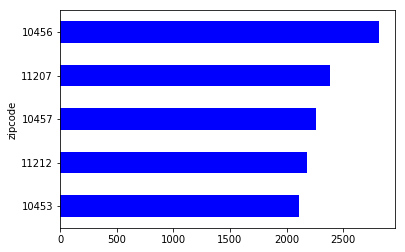

In [8]:
results_df.groupby('zipcode').zipcode.count().sort_values(ascending=False).head(5).sort_values().plot(kind='barh', color="blue")



In [ ]:
# Where are these areas?

In [24]:
type(results_df.incident_response_seconds_qy)


pandas.core.series.Series

In [22]:
results_df.incident_response_seconds_qy.head()

0     797
1     444
2     703
3     282
4    1422
Name: incident_response_seconds_qy, dtype: object

In [31]:
results_df['incident_response_seconds_qy'] = results_df['incident_response_seconds_qy'].astype(float)

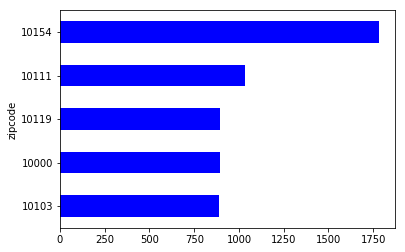

In [32]:
results_df.groupby('zipcode').incident_response_seconds_qy.mean().sort_values(ascending=False).head(5).sort_values().plot(kind='barh', color="blue")


In [ ]:
# 10154 zipcode, an area in Midtown Manhattan, suffers the longest emergency response time in NYC for respiratory problems

In [12]:
results_df.groupby('final_call_type').initial_call_type.count().sort_values(ascending=False)

final_call_type
RESPIR    113578
Name: initial_call_type, dtype: int64

In [93]:
results_df

,atom,borough,cad_incident_id,citycouncildistrict,communitydistrict,communityschooldistrict,congressionaldistrict,dispatch_response_seconds_qy,final_call_type,final_severity_level_code,...,initial_call_type,initial_severity_level_code,policeprecinct,reopen_indicator,special_event_indicator,standby_indicator,transfer_indicator,valid_dispatch_rspns_time_indc,valid_incident_rspns_time_indc,zipcode
0,NaN,BRONX,130010001,18,209,12,15,101,RESPIR,4,...,RESPIR,4,43,N,N,N,N,Y,Y,10472
1,NaN,MANHATTAN,130010013,2,106,2,12,221,RESPIR,4,...,RESPIR,4,13,N,N,N,N,Y,Y,10010
2,NaN,BROOKLYN,130010091,40,317,17,9,152,RESPIR,4,...,RESPIR,4,67,N,N,N,N,Y,Y,11226
3,NaN,BROOKLYN,130010105,35,309,17,9,39,RESPIR,4,...,RESPIR,4,71,N,N,N,N,Y,Y,11225
4,NaN,MANHATTAN,130010172,3,104,2,10,878,RESPIR,4,...,RESPIR,4,10,N,N,N,N,Y,Y,10011
5,NaN,QUEENS,130010204,32,414,27,5,23,RESPIR,4,...,RESPIR,4,100,N,N,N,N,Y,Y,11694
6,NaN,BROOKLYN,130010209,33,301,14,12,18,RESPIR,4,...,RESPIR,4,94,N,N,N,N,Y,Y,11249
7,NaN,BRONX,130010402,16,204,9,15,57,RESPIR,4,...,RESPIR,4,44,N,N,N,N,Y,Y,10456
8,NaN,BROOKLYN,130010423,37,305,19,7,11,RESPIR,4,...,RESPIR,4,75,N,N,N,N,Y,Y,11208
9,NaN,BROOKLYN,130010433,37,305,19,8,13,RESPIR,4,...,RESPIR,4,75,N,N,N,N,Y,Y,11207


### CARD

In [27]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                  "",
                  username="",
                  password="")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results1 = client.get("66ae-7zpy", final_call_type="CARD", limit=200000)

In [28]:
results1[0]

{'borough': 'BRONX',
 'cad_incident_id': '130010002',
 'citycouncildistrict': '8',
 'communitydistrict': '201',
 'communityschooldistrict': '7',
 'congressionaldistrict': '15',
 'dispatch_response_seconds_qy': '59',
 'final_call_type': 'CARD',
 'final_severity_level_code': '3',
 'first_activation_datetime': '2013-01-01T00:02:08.000',
 'first_assignment_datetime': '2013-01-01T00:01:18.000',
 'first_on_scene_datetime': '2013-01-01T00:14:30.000',
 'held_indicator': 'N',
 'incident_close_datetime': '2013-01-01T00:55:34.000',
 'incident_datetime': '2013-01-01T00:00:19.000',
 'incident_dispatch_area': 'B1',
 'incident_disposition_code': '93',
 'incident_response_seconds_qy': '851',
 'incident_travel_tm_seconds_qy': '792',
 'initial_call_type': 'CARD',
 'initial_severity_level_code': '3',
 'policeprecinct': '40',
 'reopen_indicator': 'N',
 'special_event_indicator': 'N',
 'standby_indicator': 'N',
 'transfer_indicator': 'N',
 'valid_dispatch_rspns_time_indc': 'Y',
 'valid_incident_rspns_time_

In [30]:
card_list = []

for row in results1:
    
    rowdict = {}
    
    try:
        
        rowdict['zipcode'] = row['zipcode']
        rowdict['borough'] = row['borough']
        rowdict['incident_datetime'] = row['incident_datetime']
        rowdict['first_assignment_datetime'] = row['first_assignment_datetime']
        rowdict['incident_travel_tm_seconds_qy'] = row['incident_travel_tm_seconds_qy']
        rowdict['incident_response_seconds_qy'] = row['incident_response_seconds_qy']
        rowdict['first_on_scene_datetime'] = row['first_on_scene_datetime']
        rowdict['first_to_hosp_datetime'] = row['first_to_hosp_datetime']
        rowdict['first_hosp_arrival_datetime'] = row['first_hosp_arrival_datetime']
        rowdict['dispatch_response_seconds_qy'] = row['dispatch_response_seconds_qy']
        rowdict['incident_disposition_code'] = row['incident_disposition_code']
        rowdict['final_call_type'] = row['final_call_type']

    #rowdict[''] = row['']

    except:
        
        continue
        
    card_list.append(rowdict)
    
card_df = pd.DataFrame.from_records(card_list)
card_df.head()

,borough,dispatch_response_seconds_qy,final_call_type,first_assignment_datetime,first_hosp_arrival_datetime,first_on_scene_datetime,first_to_hosp_datetime,incident_datetime,incident_disposition_code,incident_response_seconds_qy,incident_travel_tm_seconds_qy,zipcode
0,BROOKLYN,19,CARD,2013-01-01T00:22:56.000,2013-01-01T01:08:51.000,2013-01-01T00:28:54.000,2013-01-01T00:52:03.000,2013-01-01T00:22:37.000,82,377,358,11205
1,RICHMOND / STATEN ISLAND,10,CARD,2013-01-01T00:29:35.000,2013-01-01T01:17:30.000,2013-01-01T00:36:54.000,2013-01-01T01:01:06.000,2013-01-01T00:29:25.000,82,449,439,10314
2,MANHATTAN,93,CARD,2013-01-01T00:36:22.000,2013-01-01T01:13:06.000,2013-01-01T00:43:52.000,2013-01-01T01:08:04.000,2013-01-01T00:34:49.000,82,543,450,10065
3,BROOKLYN,8,CARD,2013-01-01T00:37:33.000,2013-01-01T01:03:39.000,2013-01-01T00:39:14.000,2013-01-01T00:58:19.000,2013-01-01T00:37:25.000,82,109,101,11206
4,QUEENS,18,CARD,2013-01-01T00:39:40.000,2013-01-01T01:22:42.000,2013-01-01T00:46:43.000,2013-01-01T01:15:12.000,2013-01-01T00:39:22.000,82,441,423,11420


### TODOS

* Filter columns. Narrow the number of columns
* Obtain the average response time per emergency